In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import numpy as np

In [18]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Data sets Description

train_data and test_data are samples of vectors with numerical values that represent the indices of words (encoding words to numbers)

train_labels and test_labels are vectors or 1s and 0s 

**The key point to notice on this datasets is that they are a list and not tensors (arrays)**

In [7]:
# reversing the integer of each word to the actual word of one of the training data samples
word_idx = imdb.get_word_index()
reverse_word_idx = dict([(value, key) for (key, value) in word_idx.items()])
review = ' '.join([reverse_word_idx.get(i -3, '?') for i in train_data[1]] )
#review

In [19]:
# vevtorizing data one-hot encode

def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [20]:
x_train = vectorize_sequence(train_data)
x_test  = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [21]:
# Building the Network Model

# relu implementation
#
#   output = relu(dot(W, input) + b)

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape =(10000,)))
model.add(layers.Dense(16, activation='relu', ))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
# Compiling
# Choosing the optimizer and loss function

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 332us/sample - loss: 0.5166 - accuracy: 0.7933 - val_loss: 0.3993 - val_accuracy: 0.8700
Epoch 2/20
15000/15000 [==============================] - 2s 128us/sample - loss: 0.3186 - accuracy: 0.9025 - val_loss: 0.3129 - val_accuracy: 0.8871
Epoch 3/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.2334 - accuracy: 0.9261 - val_loss: 0.2805 - val_accuracy: 0.8934
Epoch 4/20
15000/15000 [==============================] - 2s 135us/sample - loss: 0.1846 - accuracy: 0.9391 - val_loss: 0.2768 - val_accuracy: 0.8891
Epoch 5/20
15000/15000 [==============================] - 2s 133us/sample - loss: 0.1503 - accuracy: 0.9525 - val_loss: 0.3046 - val_accuracy: 0.8795
Epoch 6/20
15000/15000 [==============================] - 2s 122us/sample - loss: 0.1203 - accuracy: 0.9630 - val_loss: 0.2901 - val_accuracy: 0.8857
Epoch 7/20
15000/15000 [==========================

In [27]:
history_dict = history.history
history_dict.keys()

['loss', 'val_accuracy', 'val_loss', 'accuracy']

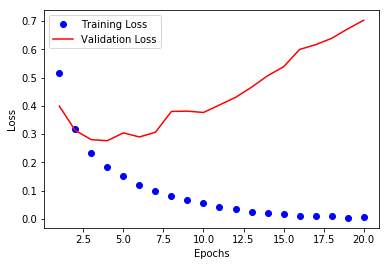

In [34]:
# Plotting training and validation loss 
import matplotlib.pyplot as plt 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1 )

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


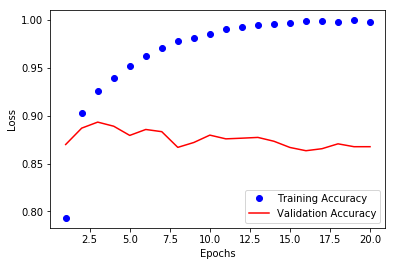

In [36]:
# Plotting Accuracy

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Model above overfit on the training data. 

In [38]:
# new model with less epochs 

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 179us/sample - loss: 0.4758 - accuracy: 0.8245
Epoch 2/4
25000/25000 [==============================] - 2s 85us/sample - loss: 0.2736 - accuracy: 0.9066
Epoch 3/4
25000/25000 [==============================] - 2s 85us/sample - loss: 0.2054 - accuracy: 0.9285
Epoch 4/4
25000/25000 [==============================] - 73s 3ms/sample - loss: 0.3015 - accuracy: 0.8808


In [39]:
results

[0.30145612186431886, 0.88084]

In [40]:
# Using model on test data set

model.predict(x_test)

array([[0.16000861],
       [0.99993575],
       [0.91667694],
       ...,
       [0.08442049],
       [0.05580342],
       [0.45298406]], dtype=float32)